# Importing Header and SoilPrep

In [1]:
import import_ipynb 
from Header import *

importing Jupyter notebook from Header.ipynb


In [2]:
import import_ipynb
from SoilPrep import * 

importing Jupyter notebook from SoilPrep.ipynb


# Step 0: Setting up decision parameters (Data Tree)

In [3]:
# 0. Available smoothing filter types: savgol1 and savgol2 ------------------------ (0)
sg_filters = ['sg1', 'sg2']

# 0. Available window lengths for the smoothing filter ---------------------------- (0)
window_lengths = [0, 1, 11, 21, 31, 41, 51, 71, 91]

# 1. Available machine learning regression models --------------------------------- (1)
ml_methods = ['cubist', 'plsr', 'gbrt']

# 2. Names of target variables in the dataframe ----------------------------------- (2)
target_names = ['Sand', 'Silt', 'Clay']

# 3. Available preprocessing for Target data -------------------------------------- (3)
prepare_target = ['none']
# 4. Available preprocessing for Spectral data ------------------------------------ (4)
prepare_spec = ['none', 'cr', 'log', 'fod', 'fod_cr', 'fod_log']

# 5. Resampling bands available for spectra --------------------------------------- (5) 
nbands_sampling = [0,2,3,5,7,9,10,11,13,15,17,19,20,21,23,25,27,29,30,31,33,35,37,39, 40, 45, 50, 55, 60, 70, 80, 90, 100]


# Setting colours for different targets        --------------------------------------
clr = ['#F4A460', '#8B7355', '#A52A2A']

# Colour scheme definition
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'

In [4]:
MetaData = {'sg_filters' : sg_filters, 'window_lengths' : window_lengths, 'prepare_spec' : prepare_spec, \
            'nbands_sampling' : nbands_sampling, 'target_names' : target_names, 'prepare_target' : prepare_target,\
            'ml_methods' : ml_methods, 'clr' : clr}

with open ('meta_data.pickle', 'wb') as file:
    pickle.dump(MetaData, file)

# Step 1a: Obtaining Spectra (Noise and Outliers removal)

In [5]:
df = pd.read_csv('Italy.csv')
spectra = df.iloc[:, 7:2158].copy()
temp_spec = spectra.copy()
spectra = temp_spec.iloc[:,60:2151].copy()
spectra.head(5)

,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,...,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491
0,0.088625,0.088922,0.088726,0.089113,0.088972,0.088203,0.087449,0.088015,0.089710,0.091106,0.090524,0.091880,0.092508,0.091135,0.092036,0.092789,0.093127,0.093511,0.094088,0.094568,0.094474,0.095251,0.096410,0.097614,0.097859,0.098206,0.099107,0.099170,0.099204,0.099553,0.100929,0.102627,0.103838,0.104182,0.104811,0.105346,0.105437,0.105945,0.106878,0.107915,0.108362,0.108999,0.109905,0.110684,0.111204,0.111684,0.112573,0.113481,0.113694,0.113497,...,0.394945,0.394394,0.393943,0.393672,0.393214,0.392623,0.391953,0.390940,0.390061,0.389512,0.389017,0.388596,0.388203,0.387496,0.386679,0.385995,0.385343,0.384979,0.384798,0.384509,0.383982,0.383455,0.382667,0.381661,0.381222,0.380977,0.380462,0.380020,0.379234,0.377965,0.377186,0.376435,0.376151,0.375860,0.375003,0.374733,0.374094,0.373085,0.372541,0.371912,0.371266,0.370933,0.370718,0.370055,0.368958,0.368165,0.367614,0.367514,0.367988,0.368236
1,0.128504,0.129120,0.128924,0.129251,0.129067,0.128753,0.128626,0.129218,0.130684,0.132027,0.131676,0.133955,0.135213,0.133668,0.134791,0.135950,0.136851,0.137534,0.138047,0.138528,0.138977,0.140021,0.141322,0.142934,0.143437,0.144069,0.145405,0.145694,0.146237,0.147058,0.148308,0.149947,0.151392,0.152344,0.153188,0.153987,0.154531,0.154996,0.156035,0.157450,0.158115,0.159066,0.160308,0.161186,0.161913,0.162628,0.163770,0.164859,0.165325,0.165493,...,0.476197,0.475522,0.474940,0.474461,0.473735,0.473184,0.472822,0.471987,0.471093,0.470734,0.470214,0.469700,0.469578,0.469052,0.468403,0.468044,0.467167,0.466103,0.465645,0.465378,0.464997,0.464733,0.464414,0.463514,0.462855,0.462880,0.462100,0.461291,0.461049,0.460534,0.460264,0.459630,0.459034,0.458453,0.457710,0.457637,0.457607,0.456742,0.455889,0.455544,0.454833,0.454801,0.455204,0.454618,0.453573,0.452215,0.451102,0.450939,0.452055,0.452472
2,0.082845,0.083003,0.082566,0.083161,0.082521,0.081488,0.080820,0.081475,0.082961,0.084263,0.084170,0.085992,0.086719,0.085114,0.086233,0.087137,0.087427,0.087876,0.088112,0.088282,0.088596,0.089657,0.091029,0.092409,0.092228,0.092504,0.093871,0.093848,0.093815,0.094178,0.095416,0.097016,0.098352,0.099094,0.099669,0.100162,0.100495,0.100944,0.101849,0.102970,0.103388,0.104164,0.105287,0.106133,0.106721,0.107253,0.108153,0.109164,0.109564,0.109538,...,0.421323,0.420788,0.420715,0.420579,0.420438,0.420634,0.420620,0.420265,0.419953,0.419618,0.419201,0.419235,0.419245,0.418774,0.418386,0.417953,0.417484,0.417426,0.417648,0.417799,0.417554,0.417191,0.416577,0.415714,0.415394,0.415310,0.415355,0.415364,0.415019,0.414706,0.414252,0.413760,0.413679,0.413626,0.413640,0.413499,0.413422,0.413150,0.412304,0.411942,0.411355,0.410592,0.410782,0.410603,0.410282,0.410224,0.409615,0.409494,0.409801,0.410048
3,0.111234,0.111728,0.111294,0.111636,0.111437,0.110872,0.110340,0.110619,0.112382,0.114265,0.114230,0.115957,0.116692,0.115173,0.116076,0.117204,0.118109,0.118285,0.118751,0.119455,0.119837,0.120574,0.121548,0.122908,0.123248,0.123733,0.124912,0.125330,0.125474,0.125661,0.126911,0.128639,0.130024,0.130626,0.131218,0.131716,0.131881,0.132198,0.133043,0.134199,0.134820,0.135472,0.136268,0.136935,0.137519,0.138098,0.139016,0.139800,0.139978,0.139942,...,0.347015,0.347029,0.347205,0.347340,0.347242,0.347068,0.346613,0.346157,0.345921,0.345616,0.345630,0.345715,0.345638,0.345621,0.345381,0.345310,0.345162,0.344876,0.344983,0.344802,0.344657,0.344502,0.343892,0.343351,0.342833,0.342943,0.343015,0.342790,0.343002,0.342811,0.342809,0.343055,0.342866,0.342580,0.342383,0.342072,0.341895,0.341663,0.341395,0.341302,0.341414,0.

In [6]:
shape_of_spectra = spectra.shape

print("Shape of DataFrame 'spectra':", shape_of_spectra)

Shape of DataFrame 'spectra': (936, 2091)


In [7]:
spectra.isnull().sum()
#mdr.isnull().sum()

401     1
402     1
403     1
404     1
405     1
       ..
2487    1
2488    1
2489    1
2490    1
2491    1
Length: 2091, dtype: int64

In [8]:
nan_rows =spectra.isnull().any(axis=1)
rows_with_nan = spectra[nan_rows]
rows_with_nan

,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,...,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491
801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
indices_to_drop = [801, 623]

In [10]:
spectra.drop(indices_to_drop, inplace=True)

In [11]:
shape_of_spectra = spectra.shape

print("Shape of DataFrame 'spectra':", shape_of_spectra)

Shape of DataFrame 'spectra': (934, 2091)


In [12]:
spectra.isnull().sum()

401     0
402     0
403     0
404     0
405     0
       ..
2487    0
2488    0
2489    0
2490    0
2491    0
Length: 2091, dtype: int64

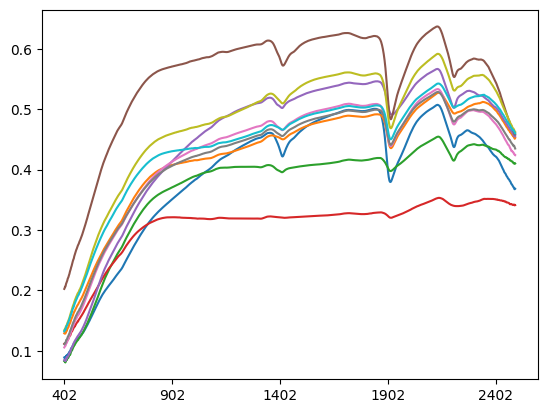

In [13]:
for i in range (0,10,1):
    spectra.iloc[i,1:].plot()

# Step 1b: Obtaining Targets (Outliers removal and Normalization)

In [14]:
df = pd.read_csv('Italy.csv')
df.rename(columns = {'Clay%': 'Clay', 'Silt%': 'Silt', 'Sand%': 'Sand'}, inplace = True)
# ------------- Target Isolation ----------------------

clr = ['#F4A460', '#8B7355', '#A52A2A']

def isolate_targets(df, target_names):
    T=[]
    for i in range (0,len(target_names)):
        T.append(df[target_names[i]])
    return(T)
    
T = isolate_targets(df,target_names)

In [15]:
# Get the number of rows for each Series in the list T
rows_info = [(s.name, s.shape[0]) for s in T]

# Print the number of rows for each Series
for name, rows in rows_info:
    print(f"Series '{name}': Rows={rows}")


Series 'Sand': Rows=936
Series 'Silt': Rows=936
Series 'Clay': Rows=936


In [16]:
# Assuming you have already created the list T

# Check each Series in the list T for NaN values
for i, series in enumerate(T):
    nan_values = series.isna().any()
    print(f"Series {i+1}:")
    print(nan_values)


Series 1:
True
Series 2:
True
Series 3:
True


In [17]:
# Iterate through each Series in the list T
for i, series in enumerate(T):
    # Get the name of the current Series
    series_name = f"Series {i+1}"
    # Find rows with NaN values in the current Series
    nan_rows = series[series.isna()]
    # Print the information
    print(f"{series_name} ({series.name}) samples with NaN values:")
    print(nan_rows.index.tolist())
    print()  # Add an empty line for clarity


Series 1 (Sand) samples with NaN values:
[623]

Series 2 (Silt) samples with NaN values:
[623]

Series 3 (Clay) samples with NaN values:
[623]



In [18]:
# Find the indices with NaN values
nan_indices = T[0][T[0].isna()].index

# Drop these indices from each Series
T_cleaned = [series.drop(nan_indices) for series in T]

print("Series after removing NaN values:")
for series in T_cleaned:
    print(series)


Series after removing NaN values:
0      47.75
1      52.45
2      29.67
3      63.53
4      29.45
       ...  
931    40.15
932    28.52
933    18.80
934    22.73
935    18.85
Name: Sand, Length: 935, dtype: float64
0      27.62
1      42.26
2      46.84
3      31.96
4      50.89
       ...  
931    24.86
932    32.15
933    37.50
934    38.03
935    38.05
Name: Silt, Length: 935, dtype: float64
0      24.63
1       5.29
2      23.49
3       4.51
4      19.66
       ...  
931    34.99
932    39.33
933    43.70
934    39.24
935    43.10
Name: Clay, Length: 935, dtype: float64


In [19]:
T_cleaned = [series.drop(index=801) for series in T_cleaned]


In [20]:
T = T_cleaned.copy()

In [21]:
T

[0      47.75
 1      52.45
 2      29.67
 3      63.53
 4      29.45
        ...  
 931    40.15
 932    28.52
 933    18.80
 934    22.73
 935    18.85
 Name: Sand, Length: 934, dtype: float64,
 0      27.62
 1      42.26
 2      46.84
 3      31.96
 4      50.89
        ...  
 931    24.86
 932    32.15
 933    37.50
 934    38.03
 935    38.05
 Name: Silt, Length: 934, dtype: float64,
 0      24.63
 1       5.29
 2      23.49
 3       4.51
 4      19.66
        ...  
 931    34.99
 932    39.33
 933    43.70
 934    39.24
 935    43.10
 Name: Clay, Length: 934, dtype: float64]

In [22]:


# for i, series in enumerate(T_cleaned):
#     nan_values = series.isna().any()
#     print(f"Series {i+1}:")
#     print(nan_values)


In [23]:
# # Convert the list of Series to a DataFrame
# T_cleaned_df = pd.concat(T_cleaned, axis=1)

# # Check the shape of the DataFrame
# num_rows, num_columns = T_cleaned_df.shape
# print(f"Number of rows: {num_rows}")
# print(f"Number of columns: {num_columns}")

# Step 1c: Spectra Preprocessing (Smooth, FOD/Contin/Log , and Resample)

## Savgol smoothing (order 1 and order 2)

In [24]:
# -------------- Smoothed Spectra spec1 (savgol order 1) and spec2 (savgol order 2)  -----------

spec1 = {}
for i in window_lengths:
    spec1[i] = filt_sg(spectra, i, 'sg1')                   

spec2 = {}
for i in window_lengths:
    spec2[i] = filt_sg(spectra, i, 'sg2')

smth_spec = sgsmooth (spectra, 3)    

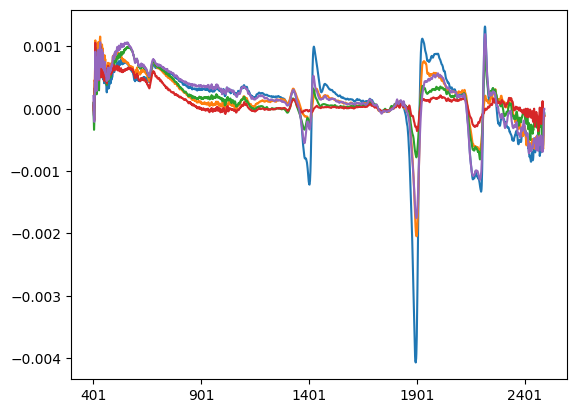

In [25]:
fod_spec = fod(smth_spec)

for i in range (0,5,1):
    fod_spec.iloc[i,:].plot()


## Continuum Removal

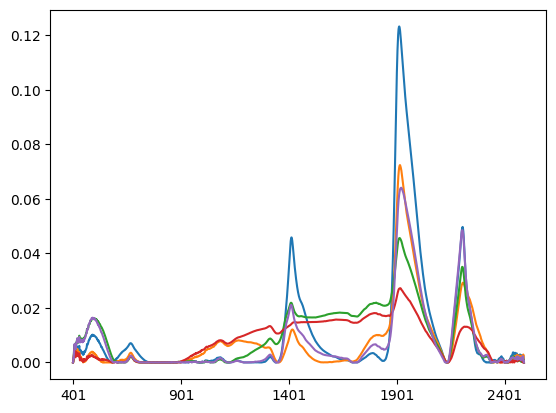

In [26]:
cr_spec = continuum_removed(spec2[51])

for i in range (0,5,1):
    cr_spec.iloc[i,:].plot()
    

## log(1/R) Transformation

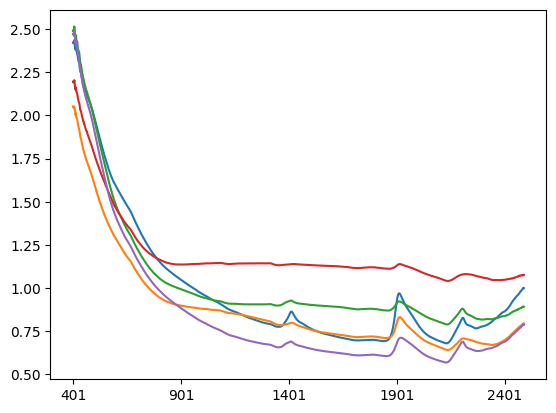

In [27]:
log_spec = ((1/spec2[51]).apply(np.log)).copy()
#log_spec.head(5)

for i in range (0,5,1):
    log_spec.iloc[i,:].plot()   

## Resampling (n_bands)

### 1. Sampled Original (sampled_spec)

In [28]:
sampled_spec = {}
for n in nbands_sampling:
    sampled_spec[n] = resample_spectra (spec2[51], n)

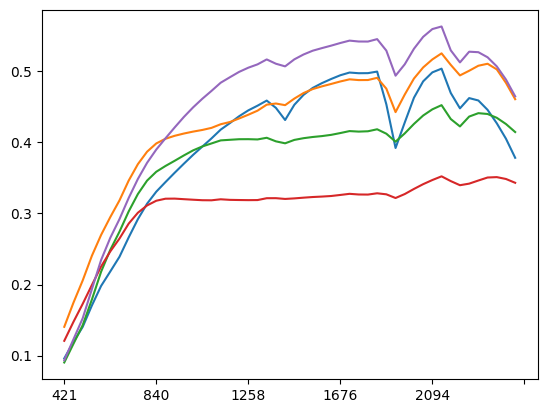

In [29]:
for i in range (0,5,1):
    sampled_spec[50].iloc[i,:].plot()

### 2. Sampled Continuum Removed  (sampled_cr)

In [30]:
sampled_cr = {}
for n in nbands_sampling:
    sampled_cr[n] = resample_spectra (cr_spec, n)

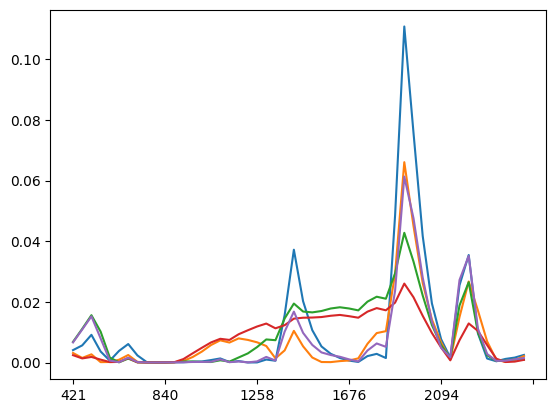

In [31]:
for i in range (0,5,1):
    sampled_cr[50].iloc[i,:].plot()

### 3. Sampled Log (sampled_log)

In [32]:
sampled_log = {}
for n in nbands_sampling:
    sampled_log[n] = resample_spectra (log_spec, n)

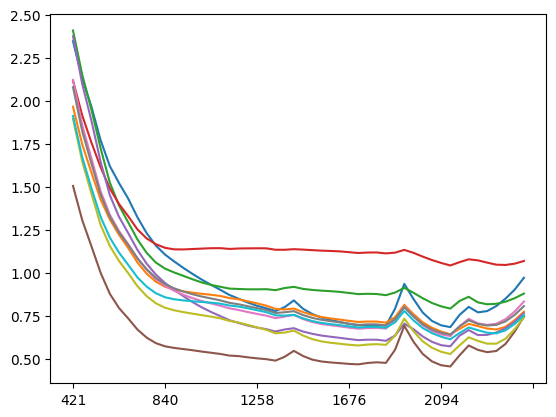

In [33]:
for i in range (0,10,1):
    sampled_log[50].iloc[i,:].plot()

### 4.  FOD of sampled spectra (fod_sampled)

In [34]:
fod_sampled = {}
for n in nbands_sampling:
    fod_sampled[n] = fod (sampled_spec[n])

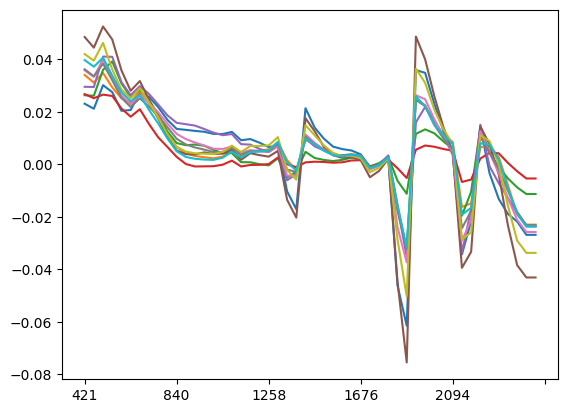

In [35]:
for i in range (0,10,1):
    fod_sampled[50].iloc[i,:].plot()

### 5. FOD of sampled_cr (fod_sampledcr)

In [36]:
fod_cr = {}
for n in nbands_sampling:
    fod_cr[n] = fod (sampled_cr[n])

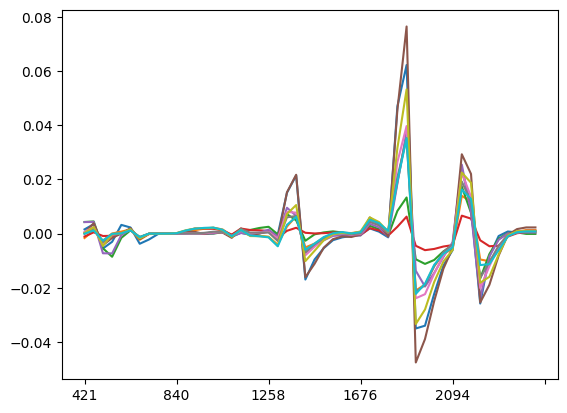

In [37]:
for i in range (0,10,1):
    fod_cr[50].iloc[i,:].plot()

### 6. FOD of sampled_log (fod_sampledlog)

In [38]:
fod_log = {}
for n in nbands_sampling:
    fod_log[n] = fod (sampled_log[n])

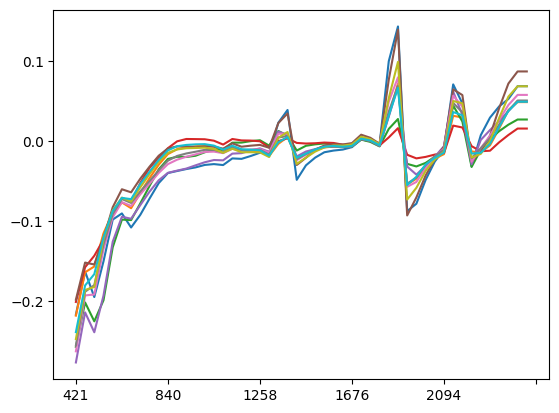

In [39]:
for i in range (0,10,1):
    fod_log[50].iloc[i,:].plot()

## Visualizing Processed Spectrum (variable samples)

In [40]:
(row, col) = spectra.shape
(row, col)

(934, 2091)

In [41]:
def plot_spec (sample, process):
    (row, col) = spectra.shape
    x1 = spec2[51].iloc[sample,:]
    x1.plot()
    if process == 'cr':
        x2 = cr_spec.iloc[sample,:]
        x2.plot()
    elif process == 'log':
        x3 = log_spec.iloc[sample,:]/3
        x3.plot()
    else:
        x4 = fod_spec.iloc[sample,:]*100
        x4.plot()
        
    plt.ylim([-0.6, 0.9])

ipywidgets.interact(plot_spec, sample = (0, row, 1), process = prepare_spec)

interactive(children=(IntSlider(value=467, description='sample', max=934), Dropdown(description='process', opt…

<function __main__.plot_spec(sample, process)>

## Correlation between wavelengths and Targets

In [42]:
def find_rpval (spectra, tar):
    (r, c) = spectra.shape
    
    r_val = spectra.iloc[[0], :].copy()
    p_val = spectra.iloc[[0], :].copy()
    
    for j in range(0, c):
        #print("Length of tar:", len(tar))
        #print("Length of spectra.iloc[:, j]:", len(spectra.iloc[:, j]))

        r_val.iloc[0,j], p_val.iloc[0,j] = stats.pearsonr(tar, spectra.iloc[:, j])
    
    return(r_val, p_val)


In [43]:
plt.style.use(['science','notebook','grid'])

def plot_corr (target, prepare, n_bands):
    
    i = target_names.index(target)    
    
    if  prepare == 'none':
        r_val, p_val = find_rpval (sampled_spec[n_bands], T_cleaned[i])
        r_val.iloc[0,:].plot(color = clr[i])
    elif  prepare == 'cr':
        r_cr, p_cr = find_rpval (sampled_cr[n_bands], T_cleaned[i])
        r_cr.iloc[0,:].plot(color = clr[i])
    elif prepare == 'log':
        r_log, p_log = find_rpval (sampled_log[n_bands], T_cleaned[i])
        r_log.iloc[0,:].plot(color = clr[i])
    elif prepare == 'fod_spec':    
        r_fod, p_fod = find_rpval (fod_sampled[n_bands], T_cleaned[i])
        r_fod.iloc[0,:].plot(color = clr[i]) 
    elif prepare == 'fod_cr':    
        r_sfodcr, p_sfodcr = find_rpval (fod_cr[n_bands], T_cleaned[i])
        r_sfodcr.iloc[0,:].plot(color = clr[i]) 
    else:   
        r_sfodlog, p_sfodlog = find_rpval (fod_log[n_bands], T_cleaned[i])
        r_sfodlog.iloc[0,:].plot(color = clr[i]) 
    
    plt.ylim([-0.9, 0.9])
    plt.show()

ipywidgets.interact(plot_corr, target = target_names, prepare = prepare_spec, n_bands = nbands_sampling)



interactive(children=(Dropdown(description='target', options=('Sand', 'Silt', 'Clay'), value='Sand'), Dropdown…

<function __main__.plot_corr(target, prepare, n_bands)>

In [44]:
Data = {'spectra' : spec2[51], 'T' : T, 'spec1': spec1, 'spec2': spec2, 'smth_spec' : smth_spec, 'fod_spec' : fod_spec,  \
       'cr_spec' : cr_spec,  'log_spec' : log_spec, 'sampled_spec' : sampled_spec, 'sampled_cr' : sampled_cr, \
        'fod_sampled' : fod_sampled, 'sampled_log' : sampled_log, 'fod_cr' : fod_cr, 'fod_log' : fod_log}

In [45]:
with open ('data.pickle', 'wb') as file:
    pickle.dump(Data, file)